In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import dateutil.parser
import datetime
%matplotlib inline

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [2]:
def read_in_initial(year, filename):
    df = pd.read_csv(filename, encoding = "ISO-8859-1", low_memory=False)
    df_race = pd.DataFrame(df['race'].value_counts())
    return df_race

In [3]:
df_2015 = read_in_initial(2015, '2015.csv')
df_2015.columns = ['2015']
df_2015['race']=df_2015.index
df_2015

,2015,race
B,11950,B
Q,5090,Q
W,2514,W
P,1409,P
A,1103,A
Z,298,Z
U,122,U
I,77,I


In [4]:
years_list = ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

totals_list = []
for year in years_list:
#Read in the data for each year
    df_year = pd.read_csv(year+'.csv', encoding = "ISO-8859-1", low_memory=False)
#get the total number of stop records for a year
    total = len(df_year['year'])
#create a dictionary for each year, containing the year and total number of stops
    dict_t = {'Year': year, 'total_count': total}
#append that dict to a list collecting the dicts for each year
    totals_list.append(dict_t)
#make a new dataframe that holds the value counts for each race
    df_race = pd.DataFrame(df_year['race'].value_counts())
#name the column with that counts after the year they are from
    df_race.columns = [year]
#make the 'race' column the index...
    df_race['race']=df_race.index
#...so you can merge on it with a df previously defined outside of this function
    df_2015 = df_2015.merge(df_race, left_on='race', right_on='race')

In [5]:
new_df_autom = df_2015.copy()
new_df_autom

,2015_x,race,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015_y
0,11950,B,77704,155033,196570,267468,243766,275588,310611,315083,350743,284229,104449,24319,11950
1,5090,Q,36413,73468,93453,119254,114037,135962,144848,150637,175302,129368,42659,9700,5090
2,2514,W,17623,28913,40713,53500,52887,57650,53601,54810,61805,50366,20820,5467,2514
3,1409,P,8168,16469,21635,28608,27831,32513,35207,38689,48438,35772,12271,2789,1409
4,1103,A,4138,8526,11859,13477,13150,16491,16845,19732,23932,17058,6845,2281,1103
5,298,Z,14089,29943,32260,22321,18202,16730,14346,15360,16867,10102,2844,739,298
6,77,I,416,1161,1620,1863,1762,2031,2271,2579,2897,2257,818,192,77


In [6]:
totals_list

[{'Year': '2003', 'total_count': 160851},
 {'Year': '2004', 'total_count': 313523},
 {'Year': '2005', 'total_count': 398191},
 {'Year': '2006', 'total_count': 506491},
 {'Year': '2007', 'total_count': 472096},
 {'Year': '2008', 'total_count': 540302},
 {'Year': '2009', 'total_count': 581168},
 {'Year': '2010', 'total_count': 601285},
 {'Year': '2011', 'total_count': 685724},
 {'Year': '2012', 'total_count': 532911},
 {'Year': '2013', 'total_count': 191851},
 {'Year': '2014', 'total_count': 45787},
 {'Year': '2015', 'total_count': 22563}]

In [7]:
totals_df = pd.DataFrame(totals_list)
totals_df

,Year,total_count
0,2003,160851
1,2004,313523
2,2005,398191
3,2006,506491
4,2007,472096
5,2008,540302
6,2009,581168
7,2010,601285
8,2011,685724
9,2012,532911


In [8]:
def convert_year(year_int):
    year_str = str(year_int)
    parsed_year = dateutil.parser.parse(year_str+'-01-01')
    return parsed_year

In [9]:
new_totals = totals_df.copy()
parsed_year_index = [convert_year(year) for year in years_list]
new_totals['parsed'] = parsed_year_index

In [10]:
new_totals

,Year,total_count,parsed
0,2003,160851,2003-01-01
1,2004,313523,2004-01-01
2,2005,398191,2005-01-01
3,2006,506491,2006-01-01
4,2007,472096,2007-01-01
5,2008,540302,2008-01-01
6,2009,581168,2009-01-01
7,2010,601285,2010-01-01
8,2011,685724,2011-01-01
9,2012,532911,2012-01-01


In [11]:
new_df_autom.index = new_df_autom['race']
new_df_autom = new_df_autom.drop('race', 1)
new_df_autom = new_df_autom.drop('2015_x', 1)

In [12]:
new_df_autom.columns = ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015']

In [13]:
new_df_autom

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
race,,,,,,,,,,,,,
B,77704,155033,196570,267468,243766,275588,310611,315083,350743,284229,104449,24319,11950
Q,36413,73468,93453,119254,114037,135962,144848,150637,175302,129368,42659,9700,5090
W,17623,28913,40713,53500,52887,57650,53601,54810,61805,50366,20820,5467,2514
P,8168,16469,21635,28608,27831,32513,35207,38689,48438,35772,12271,2789,1409
A,4138,8526,11859,13477,13150,16491,16845,19732,23932,17058,6845,2281,1103
Z,14089,29943,32260,22321,18202,16730,14346,15360,16867,10102,2844,739,298
I,416,1161,1620,1863,1762,2031,2271,2579,2897,2257,818,192,77


In [14]:
df_trans = new_df_autom.transpose()

In [15]:
df_trans

race,B,Q,W,P,A,Z,I
2003,77704,36413,17623,8168,4138,14089,416
2004,155033,73468,28913,16469,8526,29943,1161
2005,196570,93453,40713,21635,11859,32260,1620
2006,267468,119254,53500,28608,13477,22321,1863
2007,243766,114037,52887,27831,13150,18202,1762
2008,275588,135962,57650,32513,16491,16730,2031
2009,310611,144848,53601,35207,16845,14346,2271
2010,315083,150637,54810,38689,19732,15360,2579
2011,350743,175302,61805,48438,23932,16867,2897
2012,284229,129368,50366,35772,17058,10102,2257


In [16]:
number_list = df_trans.index 
df_new = df_trans.copy()
parsed_index = [convert_year(number) for number in number_list]
df_new['parsed'] = parsed_index

In [17]:
df_new.set_index(df_new['parsed'])

race,B,Q,W,P,A,Z,I,parsed
parsed,,,,,,,,
2003-01-01,77704,36413,17623,8168,4138,14089,416,2003-01-01
2004-01-01,155033,73468,28913,16469,8526,29943,1161,2004-01-01
2005-01-01,196570,93453,40713,21635,11859,32260,1620,2005-01-01
2006-01-01,267468,119254,53500,28608,13477,22321,1863,2006-01-01
2007-01-01,243766,114037,52887,27831,13150,18202,1762,2007-01-01
2008-01-01,275588,135962,57650,32513,16491,16730,2031,2008-01-01
2009-01-01,310611,144848,53601,35207,16845,14346,2271,2009-01-01
2010-01-01,315083,150637,54810,38689,19732,15360,2579,2010-01-01
2011-01-01,350743,175302,61805,48438,23932,16867,2897,2011-01-01


In [18]:
merged_total = df_new.merge(new_totals, left_on='parsed', right_on='parsed')

In [19]:
merged_total

race,B,Q,W,P,A,Z,I,parsed,Year,total_count
0,77704,36413,17623,8168,4138,14089,416,2003-01-01,2003,160851
1,155033,73468,28913,16469,8526,29943,1161,2004-01-01,2004,313523
2,196570,93453,40713,21635,11859,32260,1620,2005-01-01,2005,398191
3,267468,119254,53500,28608,13477,22321,1863,2006-01-01,2006,506491
4,243766,114037,52887,27831,13150,18202,1762,2007-01-01,2007,472096
5,275588,135962,57650,32513,16491,16730,2031,2008-01-01,2008,540302
6,310611,144848,53601,35207,16845,14346,2271,2009-01-01,2009,581168
7,315083,150637,54810,38689,19732,15360,2579,2010-01-01,2010,601285
8,350743,175302,61805,48438,23932,16867,2897,2011-01-01,2011,685724
9,284229,129368,50366,35772,17058,10102,2257,2012-01-01,2012,532911


In [20]:
merged_total.index = merged_total['parsed']

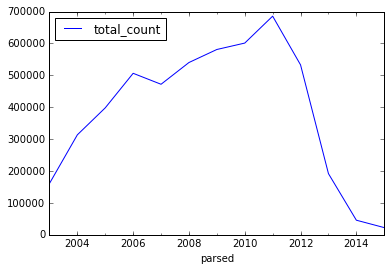

In [21]:
merged_total.plot(x='parsed', y= 'total_count')

# Build dataframe for further use

In [22]:
# constructed_df = pd.read_csv('constructed_dataset.csv')

In [32]:
constructed_df = merged_total.copy()
constructed_df = constructed_df.drop('parsed', 1)
constructed_df = constructed_df.drop('I', 1)
constructed_df = constructed_df.drop('Z', 1)
constructed_df = constructed_df.drop('A', 1)
constructed_df = constructed_df.drop('P', 1)
constructed_df['b_q_w'] = constructed_df['B'] + constructed_df['Q'] + constructed_df['W']
constructed_df['others'] = constructed_df['total_count'] - constructed_df['b_q_w']
constructed_df = constructed_df.drop('b_q_w', 1)
constructed_df

race,B,Q,W,Year,total_count,others
parsed,,,,,,
2003-01-01,77704,36413,17623,2003,160851,29111
2004-01-01,155033,73468,28913,2004,313523,56109
2005-01-01,196570,93453,40713,2005,398191,67455
2006-01-01,267468,119254,53500,2006,506491,66269
2007-01-01,243766,114037,52887,2007,472096,61406
2008-01-01,275588,135962,57650,2008,540302,71102
2009-01-01,310611,144848,53601,2009,581168,72108
2010-01-01,315083,150637,54810,2010,601285,80755
2011-01-01,350743,175302,61805,2011,685724,97874


In [33]:
constructed_df.columns = ('Black', 'Hispanic', 'White', 'Year', 'Total Stops', 'All_others')

In [34]:
constructed_df

,Black,Hispanic,White,Year,Total Stops,All_others
parsed,,,,,,
2003-01-01,77704,36413,17623,2003,160851,29111
2004-01-01,155033,73468,28913,2004,313523,56109
2005-01-01,196570,93453,40713,2005,398191,67455
2006-01-01,267468,119254,53500,2006,506491,66269
2007-01-01,243766,114037,52887,2007,472096,61406
2008-01-01,275588,135962,57650,2008,540302,71102
2009-01-01,310611,144848,53601,2009,581168,72108
2010-01-01,315083,150637,54810,2010,601285,80755
2011-01-01,350743,175302,61805,2011,685724,97874


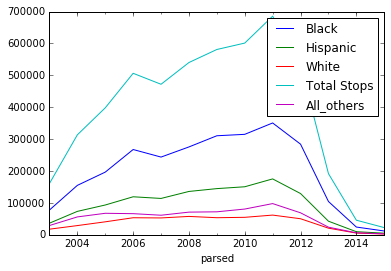

In [38]:
constructed_df.plot()

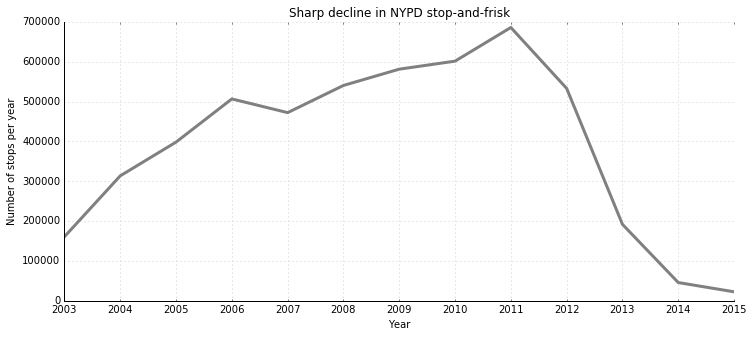

In [39]:
fig, ax = plt.subplots(figsize=(12,5))
ax = constructed_df['Total Stops'].plot(c='grey', linewidth=3)

ax.set_xticks(['2003','2004','2005','2006','2007','2008','2009','2010','2011','2012', '2013', '2014','2015'])
ax.set_xticklabels(['2003','2004','2005','2006','2007','2008','2009','2010','2011','2012', '2013', '2014','2015'])
ax.set_xlim((pd.Timestamp('2003-01-01'), pd.Timestamp("2015-01-01")))

#get rid of the frame around it
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

#tackling ticks
plt.tick_params(
which='major',
top='off',
left='off',
right= 'off',
bottom='off',
labeltop='off',
labelbottom='on')

#When plotting a grid, you can pass it options
ax.grid(True)

#When plotting a grid, you can pass it options
ax.grid(color='lightgrey', linestyle=':', linewidth=1)

#send grid to the back
ax.set_axisbelow(True)

ax.set_title("Sharp decline in NYPD stop-and-frisk")
ax.set_xlabel("Year")
ax.set_ylabel("Number of stops per year")

plt.savefig("NYPD_stop_frisk_timeseries.pdf", transparend=True)

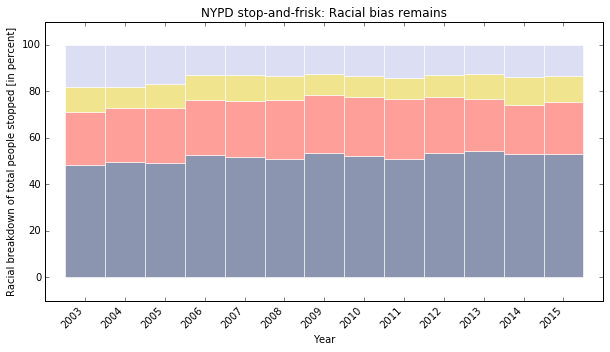

In [43]:
## CODE COPIED FROM CHRIS ALBON: http://chrisalbon.com/python/matplotlib_percentage_stacked_bar_plot.html

# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(constructed_df['Black']))] 

tick_pos = [i+(bar_width/2) for i in bar_l] 

totals = [i+j+k+l for i,j,k,l in zip(constructed_df['Black'], constructed_df['Hispanic'], constructed_df['White'], constructed_df['All_others'])]

black_rel = [i / j * 100 for  i,j in zip(constructed_df['Black'], totals)]

hisp_rel = [i / j * 100 for  i,j in zip(constructed_df['Hispanic'], totals)]

white_rel = [i / j * 100 for  i,j in zip(constructed_df['White'], totals)]

others_rel = [i / j * 100 for  i,j in zip(constructed_df['All_others'], totals)]

ax.bar(bar_l, 
       # using black_rel data
       black_rel, 
       # labeled 
       label='Black', 
       # with alpha
       alpha=0.6, 
       # with color
       color='#404e7c',
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using mid_rel data
       hisp_rel, 
       # with pre_rel
       bottom=black_rel, 
       # labeled 
       label='Hispanic', 
       # with alpha
       alpha=0.6, 
       # with color
       color='#fe5f55', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       white_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j for i,j in zip(black_rel, hisp_rel)], 
       # labeled 
       label='White',
       # with alpha
       alpha=0.6, 
       # with color
       color='#e8d245', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Create a bar chart in position bar_1
ax.bar(bar_l, 
       # using post_rel data
       others_rel, 
       # with pre_rel and mid_rel on bottom
       bottom=[i+j+k for i,j,k in zip(black_rel, hisp_rel, white_rel)], 
       # labeled 
       label='Others',
       # with alpha
       alpha=0.6, 
       # with color
       color='#c6caed', 
       # with bar width
       width=bar_width,
       # with border color
       edgecolor='white'
       )

# Set the ticks to be first names
plt.xticks(tick_pos, constructed_df['Year'])
ax.set_ylabel("Racial breakdown of total people stopped [in percent]")
ax.set_xlabel("Year")

ax.set_title("NYPD stop-and-frisk: Racial bias remains")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()

f.savefig("NYPD_racial_bias_CORRECTED.pdf", transparent=True)